In [1]:
import pandas as pd

# Paths to the CSV files
folder_path = '20M_movies/'

# Load the data
# Load and sample the data (25% of each file)
movie_df = pd.read_csv(folder_path + 'movie.csv').sample(frac=0.25, random_state=42)
genome_scores_df = pd.read_csv(folder_path + 'genome_scores.csv').sample(frac=0.25, random_state=42)
genome_tags_df = pd.read_csv(folder_path + 'genome_tags.csv').sample(frac=0.25, random_state=42)
link_df = pd.read_csv(folder_path + 'link.csv').sample(frac=0.25, random_state=42)
rating_df = pd.read_csv(folder_path + 'rating.csv').sample(frac=0.25, random_state=42)
tag_df = pd.read_csv(folder_path + 'tag.csv').sample(frac=0.25, random_state=42)


# Example Preprocessing for movie.csv
# Extract year and clean title
movie_df['year'] = movie_df['title'].str.extract(r'\((\d{4})\)')
movie_df['title'] = movie_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

# One-hot encode genres
movie_df['genres'] = movie_df['genres'].apply(lambda x: x.split('|'))
genres_encoded = movie_df['genres'].explode().unique()
for genre in genres_encoded:
    movie_df[genre] = movie_df['genres'].apply(lambda x: 1 if genre in x else 0)
movie_df.drop('genres', axis=1, inplace=True)

# Display the processed movie data
print(movie_df.head())


/var/folders/6w/6svmby417ss2398w2w4jf4jm0000gn/T/ipykernel_99617/3743005312.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


       movieId                      title  year  Crime  Drama  Action  \
12922    61116        Black Caesar (1973)  1973      1      1       0   
14085    70697             G-Force (2009)  2009      0      0       1   
23517   111931                Raze (2013)  2013      0      0       1   
8960     26630          Moonwalker (1988)  1988      0      0       0   
13152    63692  Don Q Son of Zorro (1925)  1925      0      0       0   

       Adventure  Children  Fantasy  Horror  ...  Mystery  Comedy  Sci-Fi  \
12922          0         0        0       0  ...        0       0       0   
14085          1         1        1       0  ...        0       0       0   
23517          0         0        0       1  ...        0       0       0   
8960           0         0        0       0  ...        0       0       0   
13152          1         0        0       0  ...        0       0       0   

       Documentary  (no genres listed)  Animation  Western  War  IMAX  \
12922            0       

In [2]:
# --- Continue Preprocessing ---

# Process 'genome_scores.csv' and 'genome_tags.csv'
genome_scores_df = pd.merge(genome_scores_df, genome_tags_df, on='tagId')

# Process 'rating.csv'
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'])

# Process 'tag.csv'
tag_df['timestamp'] = pd.to_datetime(tag_df['timestamp'])

# --- Data Integration ---

# Merge movie details with ratings
movie_ratings_df = pd.merge(movie_df, rating_df, on='movieId')

# Merge movie details with tags (optional, based on the need)
# This step can create a very large table if each tag is treated as a separate row. 
# Consider aggregating tags at the movie level if necessary.
movie_tags_df = pd.merge(movie_df, tag_df, on='movieId')

# Merge movie details with genome scores (optional, based on the need)
movie_genome_df = pd.merge(movie_df, genome_scores_df, on='movieId')

# Display the integrated data
print(movie_ratings_df.head())
print(movie_tags_df.head())
print(movie_genome_df.head())


   movieId                title  year  Crime  Drama  Action  Adventure  \
0    61116  Black Caesar (1973)  1973      1      1       0          0   
1    61116  Black Caesar (1973)  1973      1      1       0          0   
2    70697       G-Force (2009)  2009      0      0       1          1   
3    70697       G-Force (2009)  2009      0      0       1          1   
4    70697       G-Force (2009)  2009      0      0       1          1   

   Children  Fantasy  Horror  ...  Documentary  (no genres listed)  Animation  \
0         0        0       0  ...            0                   0          0   
1         0        0       0  ...            0                   0          0   
2         1        1       0  ...            0                   0          0   
3         1        1       0  ...            0                   0          0   
4         1        1       0  ...            0                   0          0   

   Western  War  IMAX  Film-Noir  userId  rating           timestamp

In [3]:
# Continue Preprocessing

# Process 'genome_scores.csv' and 'genome_tags.csv'
genome_scores_df = pd.merge(genome_scores_df, genome_tags_df, on='tagId')

# Process 'rating.csv'
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'])

# Process 'tag.csv'
tag_df['timestamp'] = pd.to_datetime(tag_df['timestamp'])

# Data Integration

# Merge movie details with ratings
movie_ratings_df = pd.merge(movie_df, rating_df, on='movieId')

# Merge movie details with tags
# Note: This step can result in a very large table if each tag is treated as a separate row.
# Consider aggregating tags at the movie level if necessary.
movie_tags_df = pd.merge(movie_df, tag_df, on='movieId')

# Merge movie details with genome scores
# Optional: You can select relevant columns or aggregate data as needed.
movie_genome_df = pd.merge(movie_df, genome_scores_df, on='movieId')

# Display the integrated data
print("Movie Ratings Data:")
print(movie_ratings_df.head())
print("\nMovie Tags Data:")
print(movie_tags_df.head())
print("\nMovie Genome Data:")
print(movie_genome_df.head())


Movie Ratings Data:
   movieId                title  year  Crime  Drama  Action  Adventure  \
0    61116  Black Caesar (1973)  1973      1      1       0          0   
1    61116  Black Caesar (1973)  1973      1      1       0          0   
2    70697       G-Force (2009)  2009      0      0       1          1   
3    70697       G-Force (2009)  2009      0      0       1          1   
4    70697       G-Force (2009)  2009      0      0       1          1   

   Children  Fantasy  Horror  ...  Documentary  (no genres listed)  Animation  \
0         0        0       0  ...            0                   0          0   
1         0        0       0  ...            0                   0          0   
2         1        1       0  ...            0                   0          0   
3         1        1       0  ...            0                   0          0   
4         1        1       0  ...            0                   0          0   

   Western  War  IMAX  Film-Noir  userId  rating

In [4]:
import networkx as nx

# Assuming the data has already been loaded and integrated as described earlier
# movie_ratings_df, movie_tags_df, movie_genome_df are the integrated dataframes

# Create a graph
G = nx.Graph()

# Add nodes and edges for movies and genres
for _, row in movie_df.iterrows():
    movie_id = row['movieId']
    title = row['title']
    year = row['year']
    G.add_node(movie_id, type='movie', title=title, year=year)

    for genre in genres_encoded:
        if row[genre] == 1:
            G.add_node(genre, type='genre')
            G.add_edge(movie_id, genre)

# Add nodes and edges for movies and tags
for _, row in movie_tags_df.iterrows():
    movie_id = row['movieId']
    tag = row['tag']
    G.add_node(tag, type='tag')
    G.add_edge(movie_id, tag)

# Example: Inspect the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 14377
Number of edges: 32674


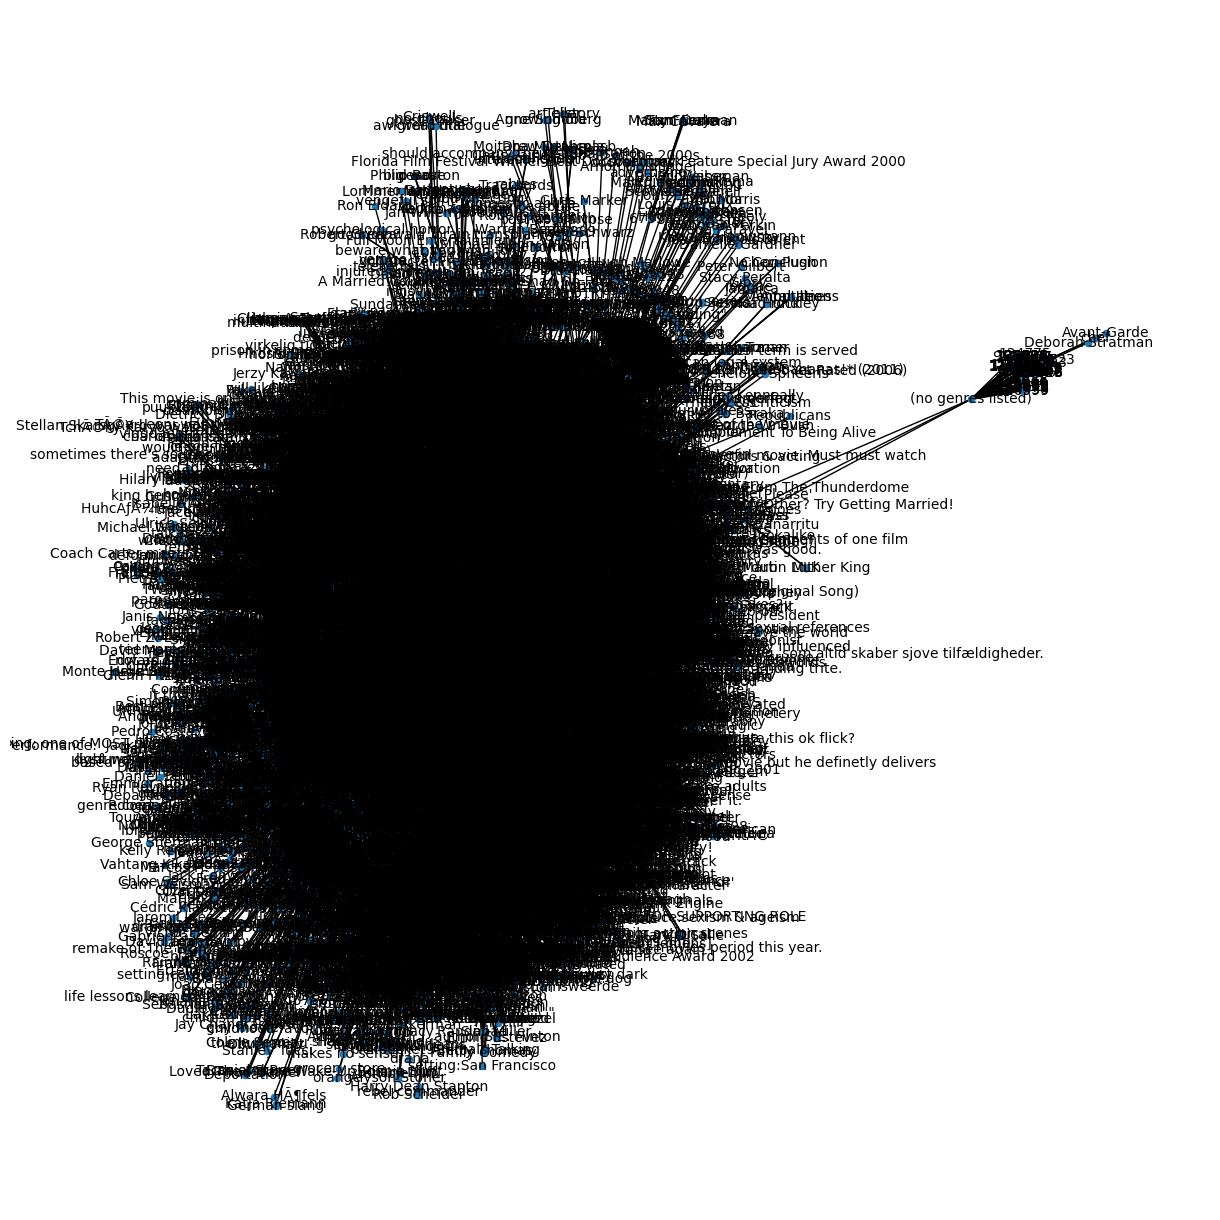

In [5]:
# You can also visualize the graph (for a small subset to keep it readable)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=20, font_size=10)
plt.show()

In [6]:
def get_unique_counts_from_dataframes(m_df, r_df):
    n_users = r_df['userId'].nunique()
    n_movies = m_df['movieId'].nunique()
    return n_users, n_movies

# Assuming movie_df and rating_df are already defined and loaded with your quarter dataset
num_users, num_movies = get_unique_counts_from_dataframes(movie_df, rating_df)

print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")


Number of unique users: 138450
Number of unique movies: 6820


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Split the data into training and testing sets
train_data, test_data = train_test_split(rating_df, test_size=0.2, random_state=42)

# Create encoders for movie and user IDs
movie_id_encoder = LabelEncoder()
user_id_encoder = LabelEncoder()

# Fit the encoders on the entire dataset
all_movie_ids = rating_df['movieId'].unique()
all_user_ids = rating_df['userId'].unique()
movie_id_encoder.fit(all_movie_ids)
user_id_encoder.fit(all_user_ids)

# Transform both the training and test sets
train_data['encoded_movieId'] = movie_id_encoder.transform(train_data['movieId'])
train_data['encoded_userId'] = user_id_encoder.transform(train_data['userId'])
test_data['encoded_movieId'] = movie_id_encoder.transform(test_data['movieId'])
test_data['encoded_userId'] = user_id_encoder.transform(test_data['userId'])

# Now use the encoded_movieId and encoded_userId for training and testing
train_user_ids = train_data['encoded_userId'].values
train_movie_ids = train_data['encoded_movieId'].values
train_ratings = train_data['rating'].values

In [14]:
# Determine the size for embedding layers
max_movie_index = all_movie_ids.max()
max_user_index = all_user_ids.max()

In [15]:
from model import MovieRecommender

recommender = MovieRecommender(max_user_index + 1, max_movie_index + 1)
recommender.compile()

In [ ]:
recommender.train(train_user_ids, train_movie_ids, train_ratings)


Epoch 1/10
125002/125002 [==============================] - 700s 6ms/step - loss: 0.8090
Epoch 2/10
125002/125002 [==============================] - 707s 6ms/step - loss: 0.7318
Epoch 3/10
125002/125002 [==============================] - 709s 6ms/step - loss: 0.7026
Epoch 4/10
125002/125002 [==============================] - 708s 6ms/step - loss: 0.6811
Epoch 5/10
125002/125002 [==============================] - 3617s 29ms/step - loss: 0.6653
Epoch 6/10
125002/125002 [==============================] - 1859s 15ms/step - loss: 0.6524
Epoch 7/10
125002/125002 [==============================] - 704s 6ms/step - loss: 0.6407
Epoch 8/10
125002/125002 [==============================] - 734s 6ms/step - loss: 0.6310
Epoch 9/10
 18301/125002 [===>..........................] - ETA: 10:39 - loss: 0.6047